# Part II - Project presentation - week distribution
## by Henrique Dias Cesario





## Investigation Overview


> In this investigation i would like to go over the service performance in the days of the week, to find out what days have the most amount of users and what days have the users that use the service for longer periods of time and trying to see what is different about them



## Dataset Overview

> This dataset is the Ford GoBike System Data where it stores the stations names, gender, dates, coordenates and user types in the dataset. It has 183412 entries, with 16 columns the version originally downloaded.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from matplotlib import rcParams
import math
%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [68]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('201902-fordgobike-tripdata.csv')
df_clean = df.copy()
types = {
    'bike_id' : 'object',
    'start_station_id' : 'object',
    'end_station_id' : 'object',
    'start_time' : 'datetime64',
    'end_time' : 'datetime64',
    'member_gender' : 'category',

}
df_clean = df_clean.astype(types)
df_clean['day_of_week_start'] = df_clean['start_time'].dt.day_name()

df_clean['day_of_week_end'] = df_clean['end_time'].dt.day_name()

df_clean = df_clean.astype({"day_of_week_start": 'category'})

def average_time_graph(x1):
    user_time = df_clean[[x1, 'duration_sec']].groupby(x1).mean()
    ax = user_time.plot(kind='bar', figsize=(10,6), fontsize=13);
    ax.get_legend().remove() 
    plt.ylabel('seconds');
#ax = sb.histplot();
rcParams['figure.figsize'] = 20,12
weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']


> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## (Visualization 1)

> Knowing which days of the week you have most traffic in your service can help a lot in the demand and to prepare for eventual troubles. If you are a user deciding what day you want to go knowing these stats can also help you avoid a day more packed.
That's why the first graph of this visualization is the count of users on each day of the week of the service.

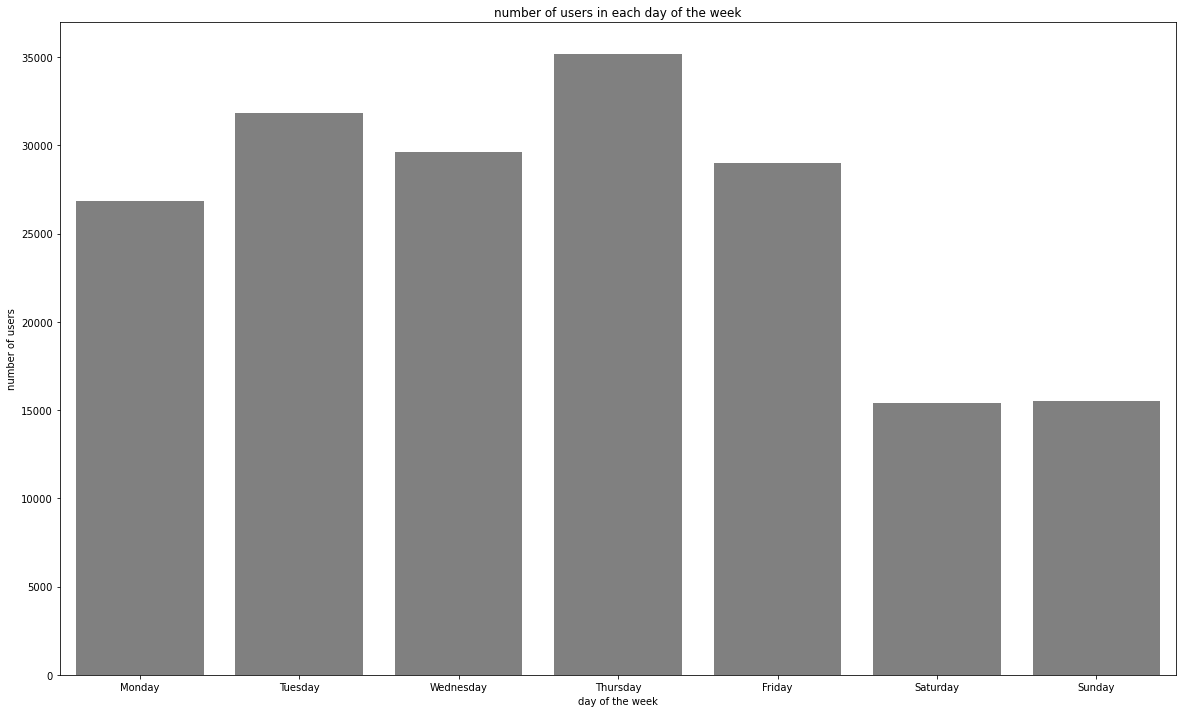

In [71]:
ax = sb.countplot(data = df_clean, x = 'day_of_week_start',order = weekdays,color = 'gray')
plt.title('number of users in each day of the week');
plt.xlabel('day of the week');
plt.ylabel('number of users');


## (Visualization 2)

> But out of this, the days that have the less amount of users have actually the longer time in use. One reason for this is that maybe during weekends most of the users use the service are doing it for recreation purposes, so they are more interested in long runs during their rest days

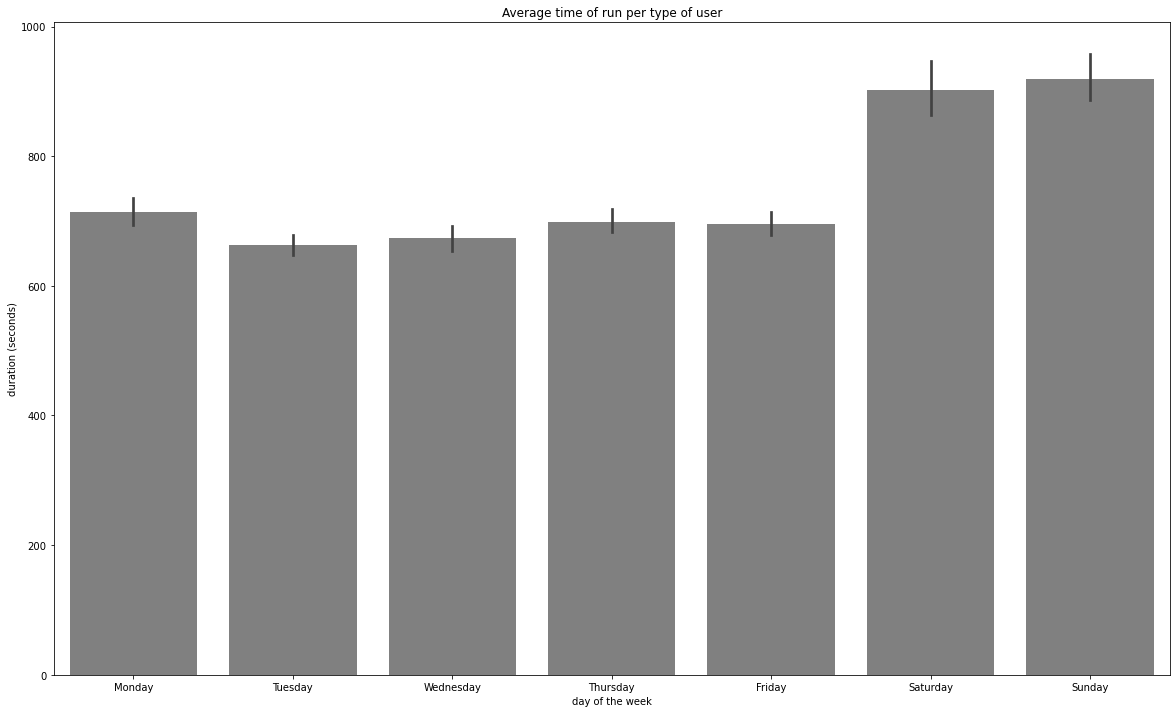

In [76]:
ax = sb.barplot(data = df_clean, x = 'day_of_week_start', y = 'duration_sec', order = weekdays,color = 'gray')
plt.ylabel('seconds');
plt.title('Average time of run per type of user');
plt.xlabel('day of the week');
plt.ylabel('duration (seconds)');

## (Visualization 3)

>But who is exactly using the service? In this graph it shows that the users with more time are those with the 'Other' gender registered followed by females. Maybe those users don't want to give away their gender or they are not represented by either of those options. Having more gender options can help find out why exactly this group use the service longer and even promote more for this group specifically.

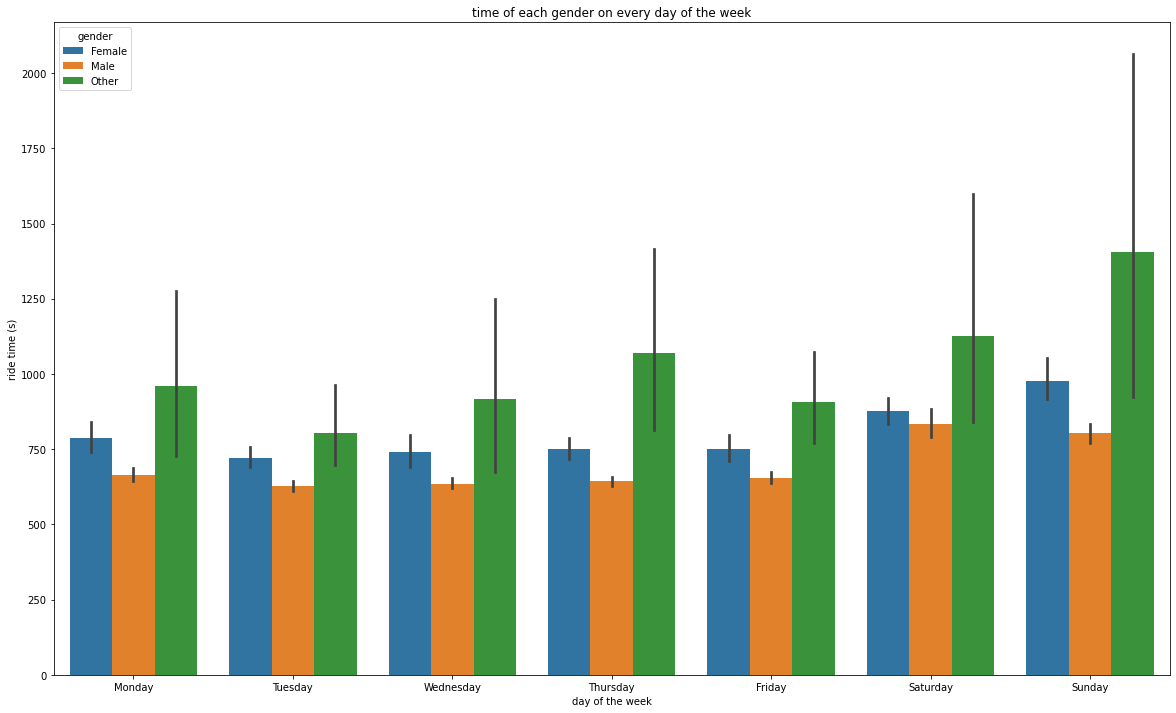

In [7]:
df_sort = df_clean.sort_values(['duration_sec']).reset_index(drop=True)
ax = sb.barplot(data = df_clean, x = 'day_of_week_start', y = 'duration_sec', hue = 'member_gender', order = weekdays )
rcParams['figure.figsize'] = 20,12
ax.legend( title = 'gender')
plt.xlabel('day of the week');
plt.ylabel('ride time (s)');
plt.title('time of each gender on every day of the week');

>**Generate Slideshow**: Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show. . From the terminal or command line, use the following expression.

In [ ]:
!jupyter nbconvert Part_II_slide_deck_project.ipynb --to slides --post serve --no-input --no-prompt

> This should open a tab in your web browser where you can scroll through your presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent slide. Make sure you remove all of the quote-formatted guide notes like this one before you finish your presentation! At last, you can stop the Kernel. 